## Import Libraries and Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

In [2]:
# Import barangay location dataset
location = pd.read_csv("location.csv")

cities = ['Cagayan de Oro City', 'Dagupan City', 'Davao City', 'Iloilo City', 'Legazpi City', 'Mandaluyong City',
          'Mandaue City', 'Muntinlupa City', 'Navotas City', 'Palayan City', 'Tacloban City', 'Zamboanga City']

location.set_index("adm4_pcode", inplace = True)
location = location.loc[location['adm3_en'].isin(cities)]
location = location[['adm3_en', 'adm4_en']]
location.head()

,adm3_en,adm4_en
adm4_pcode,,
PH015518016,Dagupan City,Lomboy
PH015518031,Dagupan City,Tapuac
PH015518022,Dagupan City,Pantal
PH015518024,Dagupan City,Barangay I (T. Bugallon)
PH034919017,Palayan City,Imelda Valley


In [3]:
# Import climate air quality dataset
air_data = pd.read_csv("climate_air_quality.csv")
air_data.set_index("adm4_pcode", inplace = True)
air_data = air_data.loc[air_data['date'] == '2022-12-31']
air_data.dropna()
air_data = air_data[["o3", "no2", "so2", "pm10", "pm25"]]
air_data.head()

,o3,no2,so2,pm10,pm25
adm4_pcode,,,,,
PH015518001,42.99,4.45,0.61,27.17,19.02
PH015518002,42.99,4.45,0.61,27.17,19.02
PH015518003,42.99,4.45,0.61,27.17,19.02
PH015518004,42.99,4.45,0.61,27.17,19.02
PH015518006,42.99,4.45,0.61,27.17,19.02


In [4]:
# Import climate atmosphere dataset
heat_data = pd.read_csv("climate_atmosphere.csv")
heat_data.set_index("adm4_pcode", inplace = True)
heat_data = heat_data.loc[heat_data['date'] == '2022-12-31']
heat_data.dropna()
heat_data.head()

,uuid,date,freq,tave,tmin,tmax,heat_index,pr,wind_speed,rh,solar_rad,uv_rad
adm4_pcode,,,,,,,,,,,,
PH015518001,CATMS001C88,2022-12-31,D,27.7,24.92,30.96,29.55,0.0,0.64,69.18,208.36,24.18
PH015518002,CATMS003911,2022-12-31,D,27.7,24.92,30.96,29.55,0.0,0.64,69.18,208.36,24.18
PH015518003,CATMS00559A,2022-12-31,D,27.7,24.92,30.96,29.55,0.0,0.64,69.18,208.36,24.18
PH015518004,CATMS007223,2022-12-31,D,27.7,24.92,30.96,29.55,0.0,0.64,69.18,208.36,24.18
PH015518006,CATMS008EAC,2022-12-31,D,27.7,24.92,30.96,29.55,0.0,0.64,69.18,208.36,24.18


In [5]:
# Import night-time lighting dataset
light_data = pd.read_csv("nighttime_lights.csv")
light_data.set_index("adm4_pcode", inplace = True)
light_data = light_data.loc[light_data['date'] == '2022-01-01']
light_data.dropna()
light_data.head()

,uuid,date,freq,avg_rad_min,avg_rad_max,avg_rad_mean,avg_rad_std,avg_rad_median
adm4_pcode,,,,,,,,
PH015518016,NTLGT002256,2022-01-01,Y,1.371240,2.145014,1.820992,0.239676,1.895808
PH015518031,NTLGT002257,2022-01-01,Y,2.167201,9.034832,5.663995,2.687575,4.564902
PH015518022,NTLGT002258,2022-01-01,Y,1.509837,9.022078,4.553129,2.248700,4.140003
PH015518024,NTLGT002259,2022-01-01,Y,10.438459,15.016158,12.727308,2.288849,12.727308
PH034919017,NTLGT00225A,2022-01-01,Y,0.589574,2.165237,1.054052,0.475109,0.924068


In [6]:
# Import amenities dataset
amenity_data = pd.read_csv("osm_poi_amenity.csv")
amenity_data.set_index("adm4_pcode", inplace = True)
amenity_data = amenity_data.loc[amenity_data['date'] == '2022-01-01']
amenity_data = amenity_data[['atm_nearest',
                             'bank_nearest',
                             'college_nearest',
                             'community_centre_nearest',
                             'convenience_nearest',
                             'fire_station_nearest',
                             'kindergarten_nearest',
                             'market_place_nearest',
                             'park_nearest',
                             'police_nearest',
                             'school_nearest',
                             'shelter_nearest',
                             'supermarket_nearest',
                             'town_hall_nearest',
                            ]]
amenity_data.dropna()
amenity_data['avg_distance'] = round((amenity_data['atm_nearest'] + \
                                            amenity_data['bank_nearest'] + \
                                            amenity_data['college_nearest'] + \
                                            amenity_data['community_centre_nearest'] + \
                                            amenity_data['convenience_nearest'] + \
                                            amenity_data['fire_station_nearest'] + \
                                            amenity_data['kindergarten_nearest'] + \
                                            amenity_data['market_place_nearest'] + \
                                            amenity_data['park_nearest'] + \
                                            amenity_data['police_nearest'] + \
                                            amenity_data['school_nearest'] + \
                                            amenity_data['shelter_nearest'] + \
                                            amenity_data['supermarket_nearest'] + \
                                            amenity_data['town_hall_nearest']) / 14, 0)
amenity_data.head()

,atm_nearest,bank_nearest,college_nearest,community_centre_nearest,convenience_nearest,fire_station_nearest,kindergarten_nearest,market_place_nearest,park_nearest,police_nearest,school_nearest,shelter_nearest,supermarket_nearest,town_hall_nearest,avg_distance
adm4_pcode,,,,,,,,,,,,,,,
PH015518016,1350.961178,1044.693472,1526.219926,10000.000000,1140.748886,2152.886539,10000.0,3778.093535,1447.965309,3156.411541,0.000000,10000.0,1131.480067,3152.435512,3563.0
PH015518031,525.205612,0.000000,1294.675375,10000.000000,0.000000,931.181252,10000.0,1928.834812,2514.551323,981.016720,0.000000,10000.0,385.246173,977.276221,2824.0
PH015518022,0.000000,0.000000,0.000000,10000.000000,0.000000,18.102258,10000.0,2007.885364,102.676357,1242.966790,0.000000,10000.0,0.000000,1248.008152,2473.0
PH015518024,0.000000,0.000000,342.930960,10000.000000,84.278377,395.419002,10000.0,2066.877400,1666.029816,2706.934959,66.871015,10000.0,0.000000,1785.634654,2794.0
PH034919017,10000.000000,10000.000000,10000.000000,1683.508479,5736.344670,10000.000000,10000.0,10000.000000,10000.000000,4.358631,0.000000,10000.0,10000.000000,0.000000,6959.0


In [7]:
# Import world population dataset
pop_data = pd.read_csv("worldpop_population.csv")
pop_data.set_index("adm4_pcode", inplace = True)
pop_data = pop_data.loc[pop_data['date'] == '2020-01-01']
pop_data['pop_count_total'] = round(pop_data['pop_count_total'])
pop_data.head()

,uuid,date,freq,pop_count_total,pop_count_mean,pop_count_median,pop_count_stdev,pop_count_min,pop_count_max,pop_density_mean,pop_density_median,pop_density_stdev,pop_density_min,pop_density_max
adm4_pcode,,,,,,,,,,,,,,
PH050506037,WDPOP0044AC,2020-01-01,Y,3198.0,55.137140,48.937912,17.289855,27.611353,119.356880,13548.703125,13548.703125,0.0,13548.703125,13548.703125
PH050506019,WDPOP0044AD,2020-01-01,Y,355.0,39.409770,28.384478,24.658198,17.391975,86.987427,NaN,NaN,NaN,NaN,NaN
PH063022118,WDPOP0044AE,2020-01-01,Y,1997.0,153.644381,26.973276,288.041872,9.792673,1129.023682,NaN,NaN,NaN,NaN,NaN
PH063022015,WDPOP0044AF,2020-01-01,Y,785.0,52.350012,52.382965,11.724451,31.649677,76.538689,NaN,NaN,NaN,NaN,NaN
PH063022110,WDPOP0044B0,2020-01-01,Y,9718.0,323.917448,268.267914,200.023861,10.259146,680.106323,NaN,NaN,NaN,NaN,NaN


In [8]:
# Import barangay geography dataset
land_data = pd.read_csv("brgy_geography.csv")
land_data.set_index("adm4_pcode", inplace = True)
land_data.head()

,uuid,date,freq,brgy_total_area,brgy_distance_to_coast,brgy_is_coastal,geometry
adm4_pcode,,,,,,,
PH050506053,BGEOG000000,2003-01-01,S,0.8428,990.730626,False,"POLYGON ((123.735986255 13.189494837, 123.7402..."
PH050506056,BGEOG000001,2003-01-01,S,7.0818,0.000000,True,"POLYGON ((123.758319446 13.0930309230001, 123...."
PH050506072,BGEOG000002,2003-01-01,S,0.0335,2560.801915,False,"POLYGON ((123.734030311 13.138708508, 123.7340..."
PH050506020,BGEOG000003,2003-01-01,S,0.0621,379.361723,False,"POLYGON ((123.754103911 13.1415778380001, 123...."
PH050506051,BGEOG000004,2003-01-01,S,1.4442,1398.701072,False,"POLYGON ((123.740796218 13.16167992, 123.74169..."


In [9]:
# Merge world population and barangay geography dataframes
density_data = pd.merge(pop_data, land_data, on="adm4_pcode", how="inner")
density_data = density_data[['pop_count_total', 'brgy_total_area']]

# Calculate the population density (population / square kilometer)
density_data['population_density'] = (density_data['pop_count_total'] / density_data['brgy_total_area'])
density_data.head()

,pop_count_total,brgy_total_area,population_density
adm4_pcode,,,
PH050506037,3198.0,0.4738,6749.683411
PH050506019,355.0,0.0763,4652.686763
PH063022118,1997.0,0.1259,15861.795075
PH063022015,785.0,0.1261,6225.218081
PH063022110,9718.0,0.2428,40024.711697


In [10]:
# Merging all dataframe based on location (adm4_pcode)
indicators = pd.merge(location, air_data, on="adm4_pcode", how="inner")
indicators = pd.merge(indicators, heat_data, on="adm4_pcode", how="inner")
indicators = pd.merge(indicators, light_data, on="adm4_pcode", how="inner")
indicators = pd.merge(indicators, amenity_data, on="adm4_pcode", how="inner")
indicators = pd.merge(indicators, density_data, on="adm4_pcode", how="inner")

In [11]:
indicators.head()

,adm3_en,adm4_en,o3,no2,so2,pm10,pm25,uuid_x,date_x,freq_x,tave,tmin,tmax,heat_index,pr,wind_speed,rh,solar_rad,uv_rad,uuid_y,date_y,freq_y,avg_rad_min,avg_rad_max,avg_rad_mean,avg_rad_std,avg_rad_median,atm_nearest,bank_nearest,college_nearest,community_centre_nearest,convenience_nearest,fire_station_nearest,kindergarten_nearest,market_place_nearest,park_nearest,police_nearest,school_nearest,shelter_nearest,supermarket_nearest,town_hall_nearest,avg_distance,pop_count_total,brgy_total_area,population_density
adm4_pcode,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PH015518016,Dagupan City,Lomboy,42.99,4.45,0.61,27.17,19.02,CATMS01AC06,2022-12-31,D,27.70,24.92,30.96,29.55,0.0,0.64,69.18,208.36,24.18,NTLGT002256,2022-01-01,Y,1.371240,2.145014,1.820992,0.239676,1.895808,1350.961178,1044.693472,1526.219926,10000.000000,1140.748886,2152.886539,10000.0,3778.093535,1447.965309,3156.411541,0.000000,10000.0,1131.480067,3152.435512,3563.0,1048.0,1.0216,1025.841817
PH015518031,Dagupan City,Tapuac,42.99,4.45,0.61,27.17,19.02,CATMS03580D,2022-12-31,D,27.70,24.92,30.96,29.55,0.0,0.64,69.18,208.36,24.18,NTLGT002257,2022-01-01,Y,2.167201,9.034832,5.663995,2.687575,4.564902,525.205612,0.000000,1294.675375,10000.000000,0.000000,931.181252,10000.0,1928.834812,2514.551323,981.016720,0.000000,10000.0,385.246173,977.276221,2824.0,8001.0,1.0440,7663.793103
PH015518022,Dagupan City,Pantal,42.99,4.45,0.61,27.17,19.02,CATMS02573C,2022-12-31,D,27.70,24.92,30.96,29.55,0.0,0.64,69.18,208.36,24.18,NTLGT002258,2022-01-01,Y,1.509837,9.022078,4.553129,2.248700,4.140003,0.000000,0.000000,0.000000,10000.000000,0.000000,18.102258,10000.0,2007.885364,102.676357,1242.966790,0.000000,10000.0,0.000000,1248.008152,2473.0,31224.0,3.2625,9570.574713
PH015518024,Dagupan City,Barangay I (T. Bugallon),42.99,4.45,0.61,27.17,19.02,CATMS02904E,2022-12-31,D,27.70,24.92,30.96,29.55,0.0,0.64,69.18,208.36,24.18,NTLGT002259,2022-01-01,Y,10.438459,15.016158,12.727308,2.288849,12.727308,0.000000,0.000000,342.930960,10000.000000,84.278377,395.419002,10000.0,2066.877400,1666.029816,2706.934959,66.871015,10000.0,0.000000,1785.634654,2794.0,2203.0,0.1814,12144.432194
PH034919017,Palayan City,Imelda Valley,42.85,4.47,0.17,31.61,22.02,CATMS05209D,2022-12-31,D,25.51,21.96,29.61,26.97,0.0,1.10,77.92,182.33,21.61,NTLGT00225A,2022-01-01,Y,0.589574,2.165237,1.054052,0.475109,0.924068,10000.000000,10000.000000,10000.000000,1683.508479,5736.344670,10000.000000,10000.0,10000.000000,10000.000000,4.358631,0.000000,10000.0,10000.000000,0.000000,6959.0,4607.0,6.3369,727.011630


## Calculate the Scores of each Indicator

### Air Quality Score

In [13]:
# List of conditions
o3_conditions = [indicators["o3"] <= 50,
                (indicators["o3"] > 50) & (indicators["o3"] <= 100),
                (indicators["o3"] > 100) & (indicators["o3"] <= 130),
                (indicators["o3"] > 130) & (indicators["o3"] <= 240),
                 indicators["o3"] > 240]

no2_conditions = [indicators["no2"] <= 40,
                 (indicators["no2"] > 40) & (indicators["no2"] <= 90),
                 (indicators["no2"] > 90) & (indicators["no2"] <= 120),
                 (indicators["no2"] > 120) & (indicators["no2"] <= 230),
                  indicators["no2"] > 230]

so2_conditions = [indicators["so2"] <= 100,
                 (indicators["so2"] > 100) & (indicators["so2"] <= 200),
                 (indicators["so2"] > 200) & (indicators["so2"] <= 350),
                 (indicators["so2"] > 350) & (indicators["so2"] <= 500),
                  indicators["so2"] > 500]

pm10_conditions = [indicators["pm10"] <= 20,
                  (indicators["pm10"] > 20) & (indicators["pm10"] <= 40),
                  (indicators["pm10"] > 40) & (indicators["pm10"] <= 50),
                  (indicators["pm10"] > 50) & (indicators["pm10"] <= 100),
                   indicators["pm10"] > 100]

pm25_conditions = [indicators["pm25"] <= 10,
                  (indicators["pm25"] > 10) & (indicators["pm25"] <= 20),
                  (indicators["pm25"] > 20) & (indicators["pm25"] <= 25),
                  (indicators["pm25"] > 25) & (indicators["pm25"] <= 50),
                   indicators["pm25"] > 50]

# List of values to return
score  = [95, 90, 85, 80, 75]

# Create new columns in the DF based on the conditions
indicators["o3_score"] = np.select(o3_conditions, score, 85)
indicators["no2_score"] = np.select(no2_conditions, score, 85)
indicators["so2_score"] = np.select(so2_conditions, score, 85)
indicators["pm10_score"] = np.select(pm10_conditions, score, 85)
indicators["pm25_score"] = np.select(pm25_conditions, score, 85)

# Create final metric column
indicators["air_score"] = round((indicators["o3_score"] + \
                                 indicators["no2_score"] + \
                                 indicators["so2_score"] + \
                                 indicators["pm10_score"] + \
                                 indicators["pm25_score"]) / 5, 0).astype(int)

### Heat Score

In [14]:
# List of conditions
heat_conditions = [indicators["heat_index"] <= 27,
                  (indicators["heat_index"] > 27) & (indicators["heat_index"] <= 32),
                  (indicators["heat_index"] > 32) & (indicators["heat_index"] <= 41),
                  (indicators["heat_index"] > 41) & (indicators["heat_index"] <= 51),
                   indicators["heat_index"] > 51]

# List of values to return
score = [95, 90, 85, 80, 75]

# Create final metric column
indicators["heat_score"] = np.select(heat_conditions, score, 85)

### Night Light Score

**Very Low Lighting** (0–5 nW/cm²/sr) : This indicates minimal or almost no artificial lighting at night.

**Low Lighting** (5–10 nW/cm²/sr) : Some artificial lighting, but insufficient for good visibility and safety at night.

**Moderate Lighting** (10–20 nW/cm²/sr) : Adequate lighting, may cover key areas, but not comprehensive.

**Good Lighting** (20–40 nW/cm²/sr) : Well-lit areas suitable for pedestrian activities and safety.

**Very Good Lighting** (40+ nW/cm²/sr) : Excellent lighting, creating a bright and safe environment.

In [15]:
# List of conditions
light_conditions = [indicators['avg_rad_mean'] > 40,
                   (indicators['avg_rad_mean'] > 20) & (indicators['avg_rad_mean'] <= 40),
                   (indicators['avg_rad_mean'] > 10) & (indicators['avg_rad_mean'] <= 20),
                   (indicators['avg_rad_mean'] > 5) & (indicators['avg_rad_mean'] <= 10),
                    indicators['avg_rad_mean'] <= 5]

# List of values to return
score = [95, 90, 85, 80, 75]

# Create final metric column
indicators['light_score'] = np.select(light_conditions, score, 85)

### Amenities Distance Score

**Very Close** (0–500 meters) : All essential amenities are within a 5–10 minute walk, making the barangay highly accessible and convenient.
Suitable for urban centers with compact infrastructure.

**Close** (500 meters – 1 kilometer) : Amenities are within a 10–15 minute walk or a short commute. Still considered highly accessible, though residents may rely slightly more on public transport or short vehicle trips.

**Moderate Distance** (1–2 kilometers) : Amenities are reachable by a 15–30 minute walk or a short drive. This range is typical for suburban areas,
where accessibility is good but may require transportation for some.

**Far** (2–5 kilometers) : Residents need to travel 30 minutes or more by foot or a longer vehicle trip to reach amenities. This is typical for less densely populated areas, or rural barangays with fewer services nearby.

**Very Far** (5+ kilometers) : Amenities are quite far, making it difficult for residents to access essential services without a car or significant travel time. This often applies to rural areas or places where infrastructure is less developed.

In [16]:
# List of conditions
distance_conditions = [indicators['avg_distance'] <= 500,
                      (indicators['avg_distance'] > 500) & (indicators['avg_distance'] <= 1000),
                      (indicators['avg_distance'] > 1000) & (indicators['avg_distance'] <= 2000),
                      (indicators['avg_distance'] > 2000) & (indicators['avg_distance'] <= 5000),
                       indicators['avg_distance'] > 5000]

# List of values to return
score = [95, 90, 85, 80, 75]

# Create final metric column
indicators['distance_score'] = np.select(distance_conditions, score, 85)

### Population Density Score

**Very Low Density** (Less than 2,000 people/km²) : This is unusually low for an urban area, potentially indicating underdevelopment, abandoned areas, or a lack of vibrancy.

**Low Density** (2,000–5,000 people/km²) : This is a lower-end urban density, often seen in peripheral urban barangays or those transitioning from suburban to urban.

**Moderate Density** (5,000–10,000 people/km²) : This is a healthy density for urban areas, supporting efficient public transportation and services, without being overcrowded.

**High Density** (10,000–20,000 people/km²) : A common range in highly developed urban centers, where density is necessary to support a vibrant economy but can lead to challenges like traffic congestion and housing pressure.

**Very High Density** (More than 20,000 people/km²) : This represents very crowded conditions, often seen in central parts of cities like Manila, where land is scarce and housing and services are highly concentrated.

In [17]:
# List of conditions
density_conditions = [indicators['population_density'] <= 2000,
                     (indicators['population_density'] > 2000) & (indicators['population_density'] <= 5000),
                     (indicators['population_density'] > 5000) & (indicators['population_density'] <= 10000),
                     (indicators['population_density'] > 10000) & (indicators['population_density'] <= 20000),
                      indicators['population_density'] > 20000]

# List of values to return
score = [95, 90, 85, 80, 75]

# Create final metric column
indicators['density_score'] = np.select(density_conditions, score, 85)

### Raw Values of Indicators

In [18]:
# Select all the raw indicator columns
indicators_raw = indicators[['o3', 'no2', 'so2', 'pm10', 'pm25', 'heat_index', 'avg_rad_mean', 'avg_distance', 'population_density']]
indicators_raw.head()

,o3,no2,so2,pm10,pm25,heat_index,avg_rad_mean,avg_distance,population_density
adm4_pcode,,,,,,,,,
PH015518016,42.99,4.45,0.61,27.17,19.02,29.55,1.820992,3563.0,1025.841817
PH015518031,42.99,4.45,0.61,27.17,19.02,29.55,5.663995,2824.0,7663.793103
PH015518022,42.99,4.45,0.61,27.17,19.02,29.55,4.553129,2473.0,9570.574713
PH015518024,42.99,4.45,0.61,27.17,19.02,29.55,12.727308,2794.0,12144.432194
PH034919017,42.85,4.47,0.17,31.61,22.02,26.97,1.054052,6959.0,727.011630


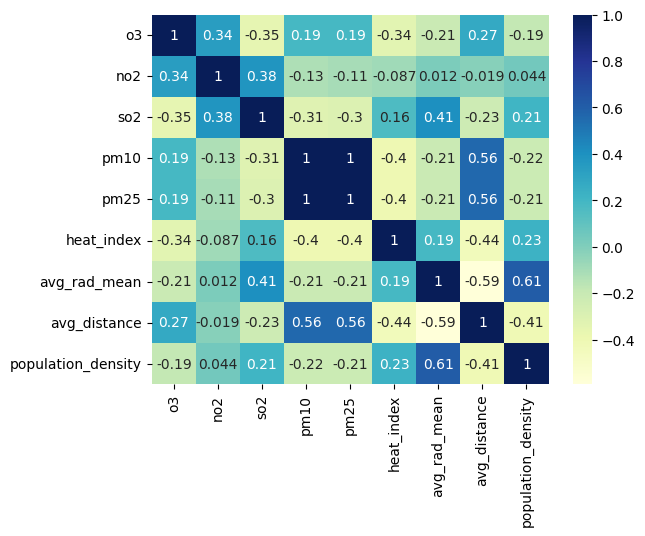

In [19]:
# Plot the correlation matrix
raw_corr = sns.heatmap(indicators_raw.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

In [20]:
# Save as CSV
indicators_raw.to_csv('indicators_raw.csv', index=True)

### Scores of Indicators

In [21]:
# Select all the score columns
indicators_score = indicators[['air_score', 'heat_score', 'light_score', 'distance_score', 'density_score']]
indicators_score.head()

,air_score,heat_score,light_score,distance_score,density_score
adm4_pcode,,,,,
PH015518016,93,90,75,80,95
PH015518031,93,90,80,80,85
PH015518022,93,90,75,80,85
PH015518024,93,90,85,80,80
PH034919017,92,95,75,75,95


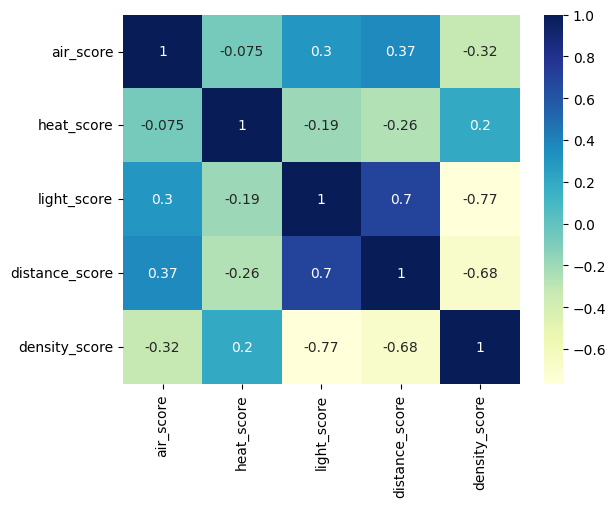

In [22]:
# Plot the correlation matrix
score_corr = sns.heatmap(indicators_score.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

In [23]:
# Save as CSV
indicators_score.to_csv('indicators_score.csv', index=True)

## Calculate the Initial Walkability and Safety Index

In [24]:
# Calculating the Initial Walkability and Safety Index
WSI = indicators[['adm3_en', 'adm4_en', 'air_score', 'heat_score', 'light_score', 'distance_score', 'density_score']].copy()
WSI['WSI'] = round((WSI["air_score"] + \
                    WSI["heat_score"] + \
                    WSI['light_score'] + \
                    WSI['distance_score'] + \
                    WSI['density_score']) / 5, 1)
WSI.head()

,adm3_en,adm4_en,air_score,heat_score,light_score,distance_score,density_score,WSI
adm4_pcode,,,,,,,,
PH015518016,Dagupan City,Lomboy,93,90,75,80,95,86.6
PH015518031,Dagupan City,Tapuac,93,90,80,80,85,85.6
PH015518022,Dagupan City,Pantal,93,90,75,80,85,84.6
PH015518024,Dagupan City,Barangay I (T. Bugallon),93,90,85,80,80,85.6
PH034919017,Palayan City,Imelda Valley,92,95,75,75,95,86.4


In [25]:
# Save as CSV
WSI.to_csv('index_initial.csv', index=False)

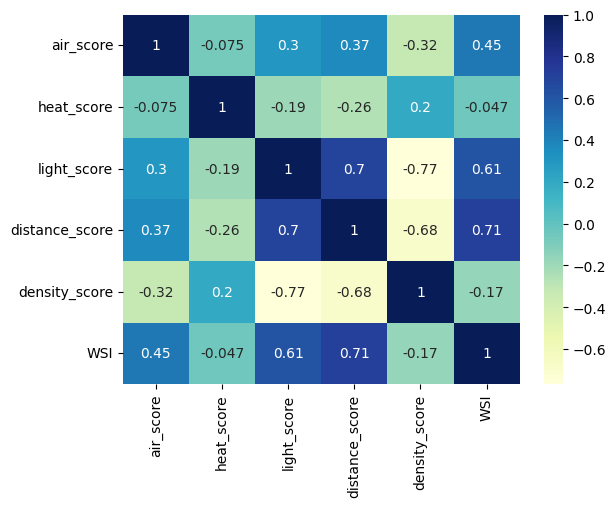

In [26]:
# Plot the correlation matrix
wsi_corr = sns.heatmap(WSI.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

## Calculate the Weighted Walkability and Safety Index

In [27]:
air = 0.45**2
heat = 0.047**2
light = 0.61**2
distance = 0.71**2
density = 0.17**2
total = air + heat + light + distance + density

p_air = round(air/total, 4)
p_heat = round(heat/total, 4)
p_light = round(light/total, 4)
p_distance = round(distance/total, 4)
p_density = round(density/total, 4)
p_total = p_air + p_heat + p_light + p_distance + p_density

print(f"Air Quality: {p_air}")
print(f"Heat: {p_heat}")
print(f"Night-time Light: {p_light}")
print(f"Distance to Amenities: {p_distance}")
print(f"Population Density: {p_density}")
print(f"Total: {p_total}")

Air Quality: 0.1825
Heat: 0.002
Night-time Light: 0.3353
Distance to Amenities: 0.4542
Population Density: 0.026
Total: 1.0


In [28]:
WSI_weighted = WSI.copy()
WSI_weighted['WSI'] = round(((p_air * WSI["air_score"]) + \
                             (p_heat * WSI["heat_score"]) + \
                             (p_light * WSI['light_score']) + \
                             (p_distance * WSI['distance_score']) + \
                             (p_density * WSI['density_score'])), 1)
WSI_weighted.head()

,adm3_en,adm4_en,air_score,heat_score,light_score,distance_score,density_score,WSI
adm4_pcode,,,,,,,,
PH015518016,Dagupan City,Lomboy,93,90,75,80,95,81.1
PH015518031,Dagupan City,Tapuac,93,90,80,80,85,82.5
PH015518022,Dagupan City,Pantal,93,90,75,80,85,80.8
PH015518024,Dagupan City,Barangay I (T. Bugallon),93,90,85,80,80,84.1
PH034919017,Palayan City,Imelda Valley,92,95,75,75,95,78.7


In [29]:
# Save as CSV
WSI_weighted.to_csv('index_weighted.csv', index=False)

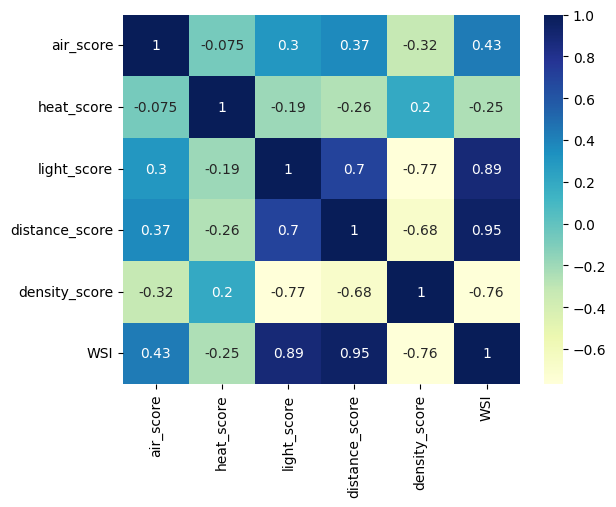

In [30]:
# Plot the correlation matrix
weighted_corr = sns.heatmap(WSI_weighted.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()